# Œ•œÄŒøŒªŒøŒ≥ŒπœÉœÑŒπŒ∫ŒÆ ŒìŒµœâŒºŒµœÑœÅŒØŒ±
ŒüŒΩŒøŒºŒ±œÑŒµœÄœéŒΩœÖŒºŒø: ŒöŒ±ŒªŒªŒπœåœÄŒ∑-ŒßœÅŒπœÉœÑŒØŒΩŒ± ŒîŒµœÉœÄŒøœÑŒØŒ¥ŒøœÖ
<br>
ŒëŒú: 1115202000045



**Œ•ŒªŒøœÄŒøŒØŒ∑œÉŒ∑ Œë: ŒöœÖœÅœÑœå Œ†ŒµœÅŒØŒ≤ŒªŒ∑ŒºŒ±**

In [1]:
#Import libraries
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import math
from tabulate import tabulate
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from math import sqrt, pow, atan2, pi, degrees
import random
from scipy.optimize import linprog
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import Delaunay

**ŒëœÖŒæŒ∑œÑŒπŒ∫œåœÇ ŒëŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ**

In [ ]:
# Incremental algorithm using Graham's Scan
def incremental_algorithm(points):
    # Sort points by their x and y coordinates
    points = sorted(points, key=lambda p: (p.x, p.y))

    # Initialize the upper hull with the first two points
    upper_hull = [points[0], points[1]]

    # Build the upper hull
    for i in range(2, len(points)):
        # Add the current point to the upper hull
        upper_hull.append(points[i])

        # While the last three points do not make a clockwise turn, remove the middle point
        while len(upper_hull) > 2 and not is_CW(upper_hull[-3], upper_hull[-2], upper_hull[-1]):
            upper_hull.pop(-2)

    # Initialize the lower hull with the last two points
    lower_hull = [points[-1], points[-2]]

    # Build the lower hull
    for i in range(len(points) - 3, -1, -1):
        # Add the current point to the lower hull
        lower_hull.append(points[i])

        # While the last three points do not make a clockwise turn, remove the middle point
        while len(lower_hull) > 2 and not is_CW(lower_hull[-3], lower_hull[-2], lower_hull[-1]):
            lower_hull.pop(-2)

    # Remove the first and last points from the lower hull to avoid duplicating points at the junction
    lower_hull.pop(0)
    lower_hull.pop(-1)

    # Combine the upper and lower hulls to form the full convex hull
    convex_hull = upper_hull + lower_hull

    return convex_hull

**ŒëŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ Œ†ŒµœÅŒπœÑœÖŒªŒØŒ≥ŒºŒ±œÑŒøœÇ**

In [ ]:
# Gift wrapping algorithm
def gift_wrapping(points):
    n = len(points)  # Number of points in the input set
    hull = []  # List to store the points of the convex hull

    # Find the leftmost point (with the smallest x-coordinate, and if tied, smallest y-coordinate)
    leftmost = min(points, key=lambda p: (p.x, p.y))
    point_on_hull = leftmost  # Start with the leftmost point

    while True:
        # Add the current point to the convex hull
        hull.append(point_on_hull)
        endpoint = points[0]  # Start with the first point as the endpoint

        # Iterate over all points to find the endpoint that is the farthest to the left
        for i in range(1, n):
            # If the endpoint is the same as the current point on hull, or if the current point is to the left of the endpoint
            if endpoint == point_on_hull or is_CCW(hull[-1], endpoint, points[i]):
                endpoint = points[i]  # Update the endpoint to the current point

        # Move to the next point on the hull
        point_on_hull = endpoint

        # Break the loop if we have returned to the starting point
        if point_on_hull == leftmost:
            break

    return hull

**ŒëŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ ŒîŒπŒ±ŒØœÅŒµŒπ Œ∫Œ±Œπ ŒíŒ±œÉŒØŒªŒµœÖŒµ**

In [ ]:
# Divide and Conquer algorithm
def divide_and_conquer(points):
    # Sort the points based on x-coordinate
    points = sorted(points, key=lambda p: (p.x, p.y))
    n = len(points)

    # Base case: Use brute force method for 5 or fewer points
    if n <= 5:
        return bruteHull(points)

    # Divide points into two subsets
    mid = n // 2
    left_points = points[:mid]
    right_points = points[mid:]

    # Recursively compute CH for the subsets
    left_hull = divide_and_conquer(left_points)
    right_hull = divide_and_conquer(right_points)

    # Merge the convex hulls
    merged_hull = merge(left_hull, right_hull)

    # Sort the merged hull points in clockwise order
    sorted_hull = clockwise_sort(merged_hull)

    return sorted_hull

**ŒëŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ QuickHull**

In [ ]:
# Quickhull algorithm
def quick_hull(points):
    hull = ConvexHull(np.array([[p.x, p.y] for p in points]))
    return hull

**ŒíŒøŒ∑Œ∏Œ∑œÑŒπŒ∫Œ≠œÇ Œ£œÖŒΩŒ±œÅœÑŒÆœÉŒµŒπœÇ**

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# Helper functions for determining the direction of turn

def is_CCW(a, b, c):
    # Determines if the turn from point a to b to c is counterclockwise
    return (b.x - a.x) * (c.y - a.y) - (b.y - a.y) * (c.x - a.x) > 0

def is_CW(a, b, c):
    # Determines if the turn from point a to b to c is clockwise
    return (b.x - a.x) * (c.y - a.y) - (b.y - a.y) * (c.x - a.x) < 0

# Function to calculate the orientation of three points
def orientation(p0, p1, p2):
    # Calculates the orientation of the triplet (p0, p1, p2)
    # Positive value indicates a counterclockwise turn
    # Negative value indicates a clockwise turn
    # Zero indicates collinear points
    return (p1.y - p0.y) * (p2.x - p1.x) - (p2.y - p1.y) * (p1.x - p0.x)

def ExtremePoint(S, find_max=True):
    # Finds the extreme point in a set S based on x-coordinate
    # If find_max is True, finds the rightmost point
    # If find_max is False, finds the leftmost point
    index = 0
    for i in range(1, len(S)):
        if (S[i].x > S[index].x if find_max else S[i].x < S[index].x):
            index = i
        elif S[i].x == S[index].x:
            if (S[i].y > S[index].y if find_max else S[i].y < S[index].y):
                index = i
    return index

# Helper function used by Divide and Conquer algorithm
def merge(CH1, CH2):
  # Merges two convex hulls CH1 and CH2 into one
  n1, n2 = len(CH1), len(CH2)

  # Find the rightmost point in CH1 and the leftmost point in CH2
  l1 = ExtremePoint(CH1, find_max=True)
  l2 = ExtremePoint(CH2, find_max=False)

  # Find the upper tangent (bridge) between CH1 and CH2
  uppertangent = (CH1[l1], CH2[l2])
  j, i = l1, l2
  done = False

  while not done:
      done = True

      #while it is not tangent to right polygon
      while(orientation(uppertangent[0], uppertangent[1], CH2[(i + 1) % n2]) <= 0):
        i = (i + 1) % n2
        uppertangent = (uppertangent[0], CH2[i])

      #while it is not tangent to left polygon
      while(orientation(uppertangent[1], uppertangent[0], CH1[(j - 1) % n1]) >= 0):
        done = False
        j = (j - 1) % n1
        uppertangent = (CH1[j], uppertangent[1])

  upper1, upper2 = j, i

  #find lower tangent(bridge)
  lowertangent = (CH1[l1], CH2[l2])
  j, i = l1, l2
  done = False

  while not done:
      done = True
      #while it is not tangent to right polygon
      while(orientation(lowertangent[0], lowertangent[1], CH2[(i - 1) % n2]) >= 0):
        i = (i - 1) % n2
        lowertangent = (lowertangent[0], CH2[i])

      #while it is not tangent to left polygon
      while(orientation(lowertangent[1], lowertangent[0], CH1[(j + 1) % n1]) <= 0):
        done = 0
        j = (j + 1) % n1
        lowertangent = (CH1[j], lowertangent[1])

  lower1, lower2 = j, i

  #merge the 2 CH
  merged = [uppertangent[0], uppertangent[1]]

  if upper2 != lower2:
      k = (upper2+1) % n2
      while k != lower2:
        merged.append(CH2[k])
        k = (k + 1) % n2

  if upper2 != lower2:
    if lower1 != upper1:
      merged.extend([lowertangent[1], lowertangent[0]])
    else:
      merged.append(lowertangent[1])
  else:
    if lower1 != upper1:
      merged.append(lowertangent[0])

  if lower1 != upper1:

      w = (lower1 + 1) % n1
      while w != upper1:
        merged.append(CH1[w])
        w = (w + 1) % n1

  return merged

def get_clockwise_angle(point, center):
    # Calculates the clockwise angle of a point relative to a center
    x = point[0] - center[0]
    y = point[1] - center[1]
    angle = math.atan2(y, x)
    if angle < 0:
        angle += 2 * math.pi
    return angle

def clockwise_sort(points):
    # Sorts points in clockwise order around their centroid
    center = (
        sum(point.x for point in points) / len(points),
        sum(point.y for point in points) / len(points)
    )
    sorted_points = sorted(points, key=lambda point: get_clockwise_angle((point.x, point.y), center), reverse=True)
    return sorted_points

# Brute-force convex hull algorithm
def bruteHull(points):
    # Finds the convex hull of a set of points using a brute-force approach
    polygon = []
    for p0 in points:
        for p1 in points:
            if p0 == p1:
                continue
            flag = True
            for p2 in points:
                if p2 in (p0, p1):
                    continue
                if is_CCW(p0, p1, p2):
                    flag = False
                    break
            if flag:
                polygon.extend([p0, p1])
    # Sorts the points of the polygon in clockwise order
    polygon = clockwise_sort(polygon)
    return polygon

############################## Plot Functions #################################

def plot_convex_hull(hull, points, title):
    plt.figure()
    plt.title(title)
    hull.append(hull[0])  # ŒöŒªŒµŒØœÉŒπŒºŒø œÄŒøŒªœÖŒ≥œéŒΩŒøœÖ
    xs, ys = zip(*[(p.x, p.y) for p in hull])
    plt.plot(xs, ys, 'b-', lw=2)
    plt.plot([p.x for p in points], [p.y for p in points], 'p')
    plt.show()

def print_hull_table(hull):
    table = [[f"Point {i+1}", point.x, point.y] for i, point in enumerate(hull)]
    print(tabulate(table, headers=["#", "X", "Y"], tablefmt="grid"))

def benchmark_algorithms(num_points_list, question=1):
    results = []

    for N in num_points_list:
        print(f"\nTesting with {N} points...\n")
        points = [Point(np.random.uniform(0, 200), np.random.uniform(0, 200)) for _ in range(N)]

        # Incremental Algorithm
        t0 = time.time()
        hull_incr = incremental_algorithm(points)
        t1 = time.time()
        incr_time = t1 - t0

        # Gift Wrapping Algorithm
        t0 = time.time()
        hull_gift = gift_wrapping(points)
        t1 = time.time()
        gift_time = t1 - t0

        # QuickHull Algorithm
        t0 = time.time()
        hull_quick = quick_hull(points)
        t1 = time.time()
        quick_time = t1 - t0

        # Divide and Conquer Algorithm
        t0 = time.time()
        hull_divide = divide_and_conquer(points)
        t1 = time.time()
        divide_time = t1 - t0

        if question==1 :
          # Incremental Algorithm

          print(f"\033[1m\n\nIncremental Algorithm took {incr_time:.4f} seconds.\033[0m")
          print(f"\033[1mIncremental Algorithm - Generated points:\033[0m")
          print_hull_table(hull_incr)
          plot_convex_hull(hull_incr, points, "Incremental Algorithm")

          # Gift Wrapping Algorithm
          print(f"\033[1m\n\nGift Wrapping took {gift_time:.4f} seconds.\033[0m")
          print(f"\033[1mGift Wrapping Algorithm - Generated points:\033[0m")
          print_hull_table(hull_incr)
          plot_convex_hull(hull_gift, points, "Gift Wrapping Algorithm")

          # QuickHull Algorithm
          print(f"\033[1m\n\nQuickHull took {quick_time:.4f} seconds.\033[0m")
          print(f"\033[1mQuickHull Algorithm - Generated points:\033[0m")
          quick_hull_points = [points[i] for i in hull_quick.vertices]
          print_hull_table(quick_hull_points)
          plot_convex_hull(quick_hull_points, points, "QuickHull Algorithm")

          # Divide and Conquer Algorithm
          print(f"\033[1m\n\nDivide and Conquer took {divide_time:.4f} seconds.\033[0m")
          print(f"\033[1mDivide and Conquer Algorithm - Generated points:\033[0m")
          print_hull_table(quick_hull_points)
          plot_convex_hull(hull_divide, points, "Divide and Conquer Algorithm")

          return

        # Store results
        results.append({
            "Points": N,
            "Incremental": incr_time,
            "Gift Wrapping": gift_time,
            "QuickHull": quick_time,
            "Divide and Conquer": divide_time
        })

    # Print results
    print("\nBenchmark Results:")
    print(f"{'Points':<10} {'Incremental':<15} {'Gift Wrapping':<15} {'QuickHull':<15} {'Divide and Conquer':<20}")
    for result in results:
        print(f"{result['Points']:<10} {result['Incremental']:<15.4f} {result['Gift Wrapping']:<15.4f} {result['QuickHull']:<15.4f} {result['Divide and Conquer']:<20.4f}")

    # Plot results
    plot_results(results)

def plot_results(results):
    points = [result["Points"] for result in results]
    incremental_times = [result["Incremental"] for result in results]
    gift_wrapping_times = [result["Gift Wrapping"] for result in results]
    quick_hull_times = [result["QuickHull"] for result in results]
    divide_and_conquer_times = [result["Divide and Conquer"] for result in results]

    plt.figure(figsize=(12, 8))
    plt.plot(points, incremental_times, label="Incremental Algorithm", marker='o')
    plt.plot(points, gift_wrapping_times, label="Gift Wrapping Algorithm", marker='o')
    plt.plot(points, quick_hull_times, label="QuickHull Algorithm", marker='o')
    plt.plot(points, divide_and_conquer_times, label="Divide and Conquer Algorithm", marker='o')

    plt.xlabel("Number of Points")
    plt.ylabel("Time (seconds)")
    plt.title("Performance Comparison of Convex Hull Algorithms")
    plt.legend()
    plt.grid(True)
    plt.show()

**main function - Œ•ŒªŒøœÄŒøŒØŒ∑œÉŒ∑**



QUESTION 1

Testing with 120 points...



Incremental Algorithm took 0.0007 seconds.
Incremental Algorithm - Generated points:
+----------+------------+------------+
| #        |          X |          Y |
+==========+============+============+
| Point 1  |   0.644822 |  91.5746   |
+----------+------------+------------+
| Point 2  |   0.953421 | 190.554    |
+----------+------------+------------+
| Point 3  |  12.1627   | 194.413    |
+----------+------------+------------+
| Point 4  | 171.803    | 193.153    |
+----------+------------+------------+
| Point 5  | 199.54     | 187.134    |
+----------+------------+------------+
| Point 6  | 199.327    |  62.7308   |
+----------+------------+------------+
| Point 7  | 197.528    |  16.6441   |
+----------+------------+------------+
| Point 8  | 195.304    |   3.00701  |
+----------+------------+------------+
| Point 9  | 129.252    |   0.823849 |
+----------+------------+------------+
| Point 10 | 101.452    |   0.262704 |
+----------+-

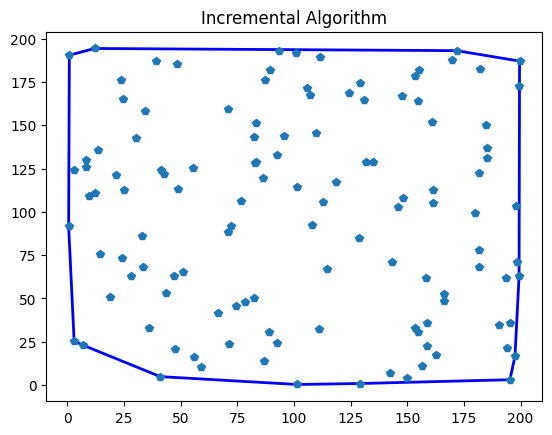



Gift Wrapping took 0.0011 seconds.
Gift Wrapping Algorithm - Generated points:
+----------+------------+------------+
| #        |          X |          Y |
+==========+============+============+
| Point 1  |   0.644822 |  91.5746   |
+----------+------------+------------+
| Point 2  |   0.953421 | 190.554    |
+----------+------------+------------+
| Point 3  |  12.1627   | 194.413    |
+----------+------------+------------+
| Point 4  | 171.803    | 193.153    |
+----------+------------+------------+
| Point 5  | 199.54     | 187.134    |
+----------+------------+------------+
| Point 6  | 199.327    |  62.7308   |
+----------+------------+------------+
| Point 7  | 197.528    |  16.6441   |
+----------+------------+------------+
| Point 8  | 195.304    |   3.00701  |
+----------+------------+------------+
| Point 9  | 129.252    |   0.823849 |
+----------+------------+------------+
| Point 10 | 101.452    |   0.262704 |
+----------+------------+------------+
| Point 11 |  41.0489 

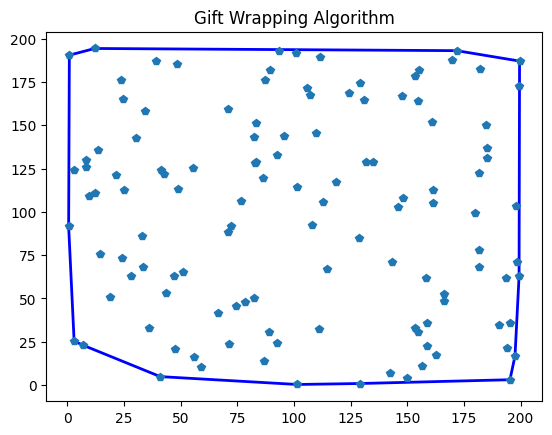



QuickHull took 0.0010 seconds.
QuickHull Algorithm - Generated points:
+----------+------------+------------+
| #        |          X |          Y |
+==========+============+============+
| Point 1  |   0.953421 | 190.554    |
+----------+------------+------------+
| Point 2  |   0.644822 |  91.5746   |
+----------+------------+------------+
| Point 3  |   3.06573  |  25.277    |
+----------+------------+------------+
| Point 4  |   7.19606  |  22.849    |
+----------+------------+------------+
| Point 5  |  41.0489   |   4.81123  |
+----------+------------+------------+
| Point 6  | 101.452    |   0.262704 |
+----------+------------+------------+
| Point 7  | 129.252    |   0.823849 |
+----------+------------+------------+
| Point 8  | 195.304    |   3.00701  |
+----------+------------+------------+
| Point 9  | 197.528    |  16.6441   |
+----------+------------+------------+
| Point 10 | 199.327    |  62.7308   |
+----------+------------+------------+
| Point 11 | 199.54     | 187.

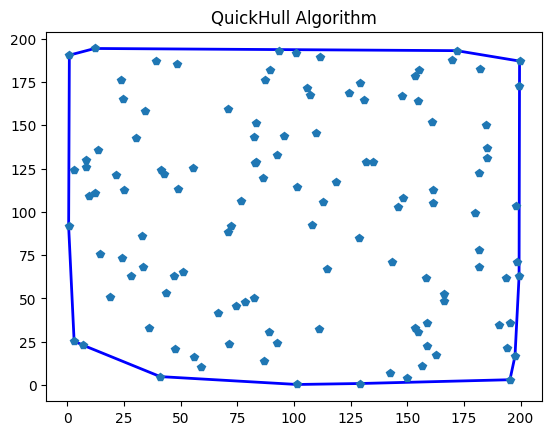



Divide and Conquer took 0.0031 seconds.
Divide and Conquer Algorithm - Generated points:
+----------+------------+------------+
| #        |          X |          Y |
+==========+============+============+
| Point 1  |   0.953421 | 190.554    |
+----------+------------+------------+
| Point 2  |   0.644822 |  91.5746   |
+----------+------------+------------+
| Point 3  |   3.06573  |  25.277    |
+----------+------------+------------+
| Point 4  |   7.19606  |  22.849    |
+----------+------------+------------+
| Point 5  |  41.0489   |   4.81123  |
+----------+------------+------------+
| Point 6  | 101.452    |   0.262704 |
+----------+------------+------------+
| Point 7  | 129.252    |   0.823849 |
+----------+------------+------------+
| Point 8  | 195.304    |   3.00701  |
+----------+------------+------------+
| Point 9  | 197.528    |  16.6441   |
+----------+------------+------------+
| Point 10 | 199.327    |  62.7308   |
+----------+------------+------------+
| Point 11 |

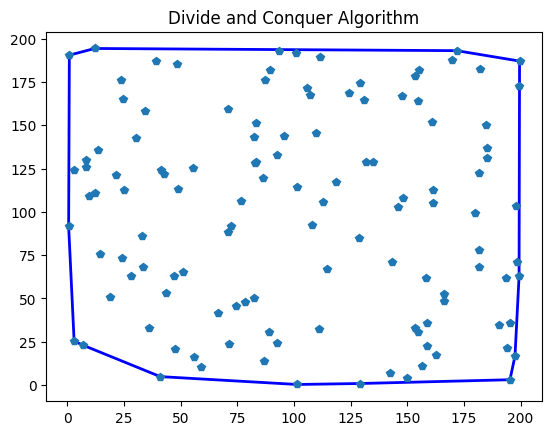




QUESTION 2


Testing with 1000 points...


Testing with 50000 points...


Testing with 200000 points...


Testing with 1000000 points...


Benchmark Results:
Points     Incremental     Gift Wrapping   QuickHull       Divide and Conquer  
1000       0.0095          0.0164          0.0022          0.0259              
50000      0.4584          0.8044          0.1824          1.0447              
200000     1.3668          3.1640          0.3969          10.8957             
1000000    7.3284          20.5721         2.4261          37.3425             


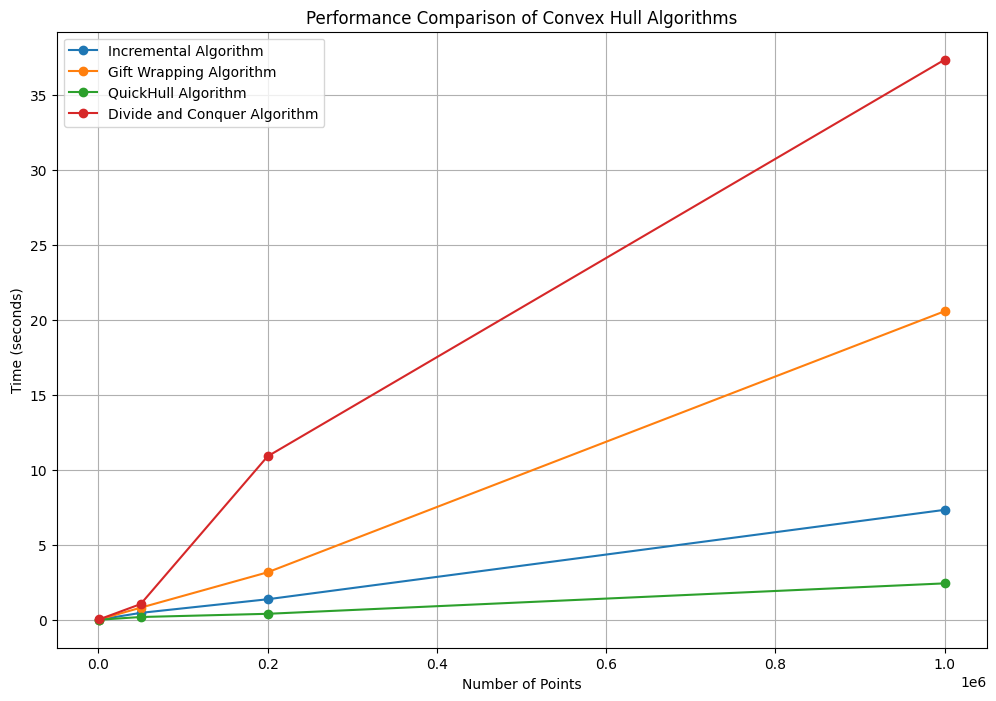

In [ ]:
def main():

    # QUESTION 1
    print(f"\033[1m\n\nQUESTION 1\033[0m")
    num_points_list = [120]
    benchmark_algorithms(num_points_list)

    # QUESTION 2
    print(f"\033[1m\n\n\nQUESTION 2\n\033[0m")
    num_points_list = [1000, 50000, 200000, 1000000]  # Different point sets for comparison
    benchmark_algorithms(num_points_list, 2)

if __name__ == '__main__':
    main()

**Œ†Œ±œÅŒ±œÑŒ∑œÅŒÆœÉŒµŒπœÇ**

**1. Incremental Algorithm**
Œ†ŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ±: Œ£œÖŒΩŒÆŒ∏œâœÇ ùëÇ(ùëõ^2) Œ≥ŒπŒ± œÑŒøŒΩ œÖœÄŒøŒªŒøŒ≥ŒπœÉŒºœå œÑŒ∑œÇ Œ∫œÖœÅœÑŒÆœÇ œÄŒøŒªœÖŒ≥œâŒΩŒπŒ∫ŒÆœÇ. ŒëœÖœÑŒÆ Œ∑ œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ± œÄœÅŒøŒ∫œçœÄœÑŒµŒπ Œ±œÄœå œÑŒ∑ŒΩ Œ±ŒΩŒ¨Œ≥Œ∫Œ∑ ŒµŒªŒ≠Œ≥œáŒøœÖ œåŒªœâŒΩ œÑœâŒΩ œÄœÅŒøŒ∑Œ≥ŒøœÖŒºŒ≠ŒΩœâŒΩ œÉŒ∑ŒºŒµŒØœâŒΩ Œ≥ŒπŒ± œÑŒ∑ Œ¥ŒπŒ±œÑŒÆœÅŒ∑œÉŒ∑ œÑŒ∑œÇ Œ∫œÖœÅœÑœåœÑŒ∑œÑŒ±œÇ , œÄŒ±œÅŒ¨ œÑŒ∑ŒΩ Œ±œÅœáŒπŒ∫ŒÆ œÑŒ±ŒæŒπŒΩœåŒºŒ∑œÉŒ∑ œÄŒøœÖ Œ≠œáŒµŒπ œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ± ùëÇ(ùëõlogùëõ).

Œ†Œ±œÅŒ±œÑŒÆœÅŒ∑œÉŒ∑: Œü œáœÅœåŒΩŒøœÇ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑œÇ Œ±œÖŒæŒ¨ŒΩŒµœÑŒ±Œπ œÉŒ∑ŒºŒ±ŒΩœÑŒπŒ∫Œ¨ ŒºŒµ œÑŒ∑ŒΩ Œ±œçŒæŒ∑œÉŒ∑ œÑŒøœÖ Œ±œÅŒπŒ∏ŒºŒøœç œÑœâŒΩ œÉŒ∑ŒºŒµŒØœâŒΩ, Œ∫Œ¨œÑŒπ œÄŒøœÖ ŒµŒØŒΩŒ±Œπ Œ±ŒΩŒ±ŒºŒµŒΩœåŒºŒµŒΩŒø ŒªœåŒ≥œâ œÑŒ∑œÇ œÑŒµœÑœÅŒ±Œ≥œâŒΩŒπŒ∫ŒÆœÇ œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ±œÇ. ŒìŒπŒ± ŒºŒπŒ∫œÅŒ≠œÇ ŒµŒπœÉœåŒ¥ŒøœÖœÇ (1000 œÉŒ∑ŒºŒµŒØŒ±), Œø œáœÅœåŒΩŒøœÇ ŒµŒØŒΩŒ±Œπ ŒªŒøŒ≥ŒπŒ∫œåœÇ, Œ±ŒªŒªŒ¨ Œ≥ŒØŒΩŒµœÑŒ±Œπ œÄŒøŒªœç œÄŒπŒø Œ±œÅŒ≥œåœÇ Œ∫Œ±Œ∏œéœÇ Œ±œÖŒæŒ¨ŒΩŒµœÑŒ±Œπ Œø Œ±œÅŒπŒ∏ŒºœåœÇ œÑœâŒΩ œÉŒ∑ŒºŒµŒØœâŒΩ.

**2. Gift Wrapping Algorithm**
Œ†ŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ±: Œü Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ Gift Wrapping (Œ≥ŒΩœâœÉœÑœåœÇ Œ∫Œ±Œπ œâœÇ Jarvis March) Œ≠œáŒµŒπ œáŒµŒπœÅœåœÑŒµœÅŒ∑ œÄŒµœÅŒØœÄœÑœâœÉŒ∑ œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ±œÇ ùëÇ(ùëõ‚Ñé), œåœÄŒøœÖ ‚Ñé ŒµŒØŒΩŒ±Œπ Œø Œ±œÅŒπŒ∏ŒºœåœÇ œÑœâŒΩ œÉŒ∑ŒºŒµŒØœâŒΩ œÉœÑŒø œÄŒµœÅŒØŒ≥œÅŒ±ŒºŒºŒ±. Œ£œÑŒ∑ œáŒµŒπœÅœåœÑŒµœÅŒ∑ œÄŒµœÅŒØœÄœÑœâœÉŒ∑, Œ±œÖœÑœå ŒºœÄŒøœÅŒµŒØ ŒΩŒ± œÜœÑŒ¨œÉŒµŒπ Œ∫ŒøŒΩœÑŒ¨ œÉœÑŒø
ùëÇ(ùëõ^2) Œ±ŒΩ œÑŒø œÄŒµœÅŒØŒ≥œÅŒ±ŒºŒºŒ± ŒµŒØŒΩŒ±Œπ œÉœáŒµŒ¥œåŒΩ ŒØœÉŒø ŒºŒµ œÑŒøŒΩ Œ±œÅŒπŒ∏Œºœå œÑœâŒΩ œÉŒ∑ŒºŒµŒØœâŒΩ.

Œ†Œ±œÅŒ±œÑŒÆœÅŒ∑œÉŒ∑: Œü Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ Œ±œÖœÑœåœÇ ŒµœÄŒØœÉŒ∑œÇ Œ¥ŒµŒØœáŒΩŒµŒπ Œ±œçŒæŒ∑œÉŒ∑ œÉœÑŒøŒΩ œáœÅœåŒΩŒø ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑œÇ ŒºŒµ Œ±œÖŒæŒ±ŒΩœåŒºŒµŒΩŒ± Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ±, Œ∫Œ±Œπ ŒµŒ∫œÑŒµŒªŒµŒØœÑŒ±Œπ œáŒµŒπœÅœåœÑŒµœÅŒ± Œ±œÄœå œÑŒøŒΩ QuickHull Œ≥ŒπŒ± ŒºŒµŒ≥Œ±ŒªœçœÑŒµœÅŒµœÇ ŒµŒπœÉœåŒ¥ŒøœÖœÇ. ŒìŒπŒ± 1.000.000 œÉŒ∑ŒºŒµŒØŒ±, Œø œáœÅœåŒΩŒøœÇ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑œÇ ŒµŒØŒΩŒ±Œπ œÉŒ∑ŒºŒ±ŒΩœÑŒπŒ∫Œ¨ Œ±œÅŒ≥œåœÇ, œÄŒøœÖ Œ±ŒΩœÑŒπŒ∫Œ±œÑŒøœÄœÑœÅŒØŒ∂ŒµŒπ œÑŒ∑ŒΩ œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ± ùëÇ(ùëõ‚Ñé).

**3. QuickHull Algorithm**
Œ†ŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ±: Œü QuickHull Œ≠œáŒµŒπ ŒºŒ≠œÉŒ∑ œÄŒµœÅŒØœÄœÑœâœÉŒ∑ œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ±œÇ ùëÇ(ùëõlog‚Å°ùëõ), Œ±ŒªŒªŒ¨ ŒºœÄŒøœÅŒµŒØ ŒΩŒ± ŒµœÄŒπŒ¥ŒµŒπŒΩœâŒ∏ŒµŒØ œÉŒµ ùëÇ(ùëõ^2) œÉœÑŒ∑ œáŒµŒπœÅœåœÑŒµœÅŒ∑ œÄŒµœÅŒØœÄœÑœâœÉŒ∑. Œó Œ±œÄœåŒ¥ŒøœÉŒÆ œÑŒøœÖ œÑŒµŒØŒΩŒµŒπ ŒΩŒ± ŒµŒØŒΩŒ±Œπ Œ∫Œ±ŒªœçœÑŒµœÅŒ∑ Œ±œÄœå œÑŒøœÖœÇ Œ¨ŒªŒªŒøœÖœÇ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖœÇ Œ≥ŒπŒ± œÄŒøŒªŒªŒ≠œÇ œÄœÅŒ±Œ∫œÑŒπŒ∫Œ≠œÇ œÄŒµœÅŒπœÄœÑœéœÉŒµŒπœÇ.

Œ†Œ±œÅŒ±œÑŒÆœÅŒ∑œÉŒ∑: Œü QuickHull Œ±œÄŒøŒ¥ŒØŒ¥ŒµŒπ œÄŒøŒªœç Œ∫Œ±ŒªŒ¨, Œ±Œ∫œåŒºŒ∑ Œ∫Œ±Œπ Œ≥ŒπŒ± ŒºŒµŒ≥Œ¨ŒªŒµœÇ ŒµŒπœÉœåŒ¥ŒøœÖœÇ, Œ∫Œ±Œπ Œø œáœÅœåŒΩŒøœÇ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑œÇ Œ±œÖŒæŒ¨ŒΩŒµœÑŒ±Œπ œÄŒπŒø Œ±œÅŒ≥Œ¨ œÉŒµ œÉœçŒ≥Œ∫œÅŒπœÉŒ∑ ŒºŒµ œÑŒøœÖœÇ Incremental Œ∫Œ±Œπ Gift Wrapping Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖœÇ. ŒëœÖœÑœå ŒµŒØŒΩŒ±Œπ œÉœçŒºœÜœâŒΩŒø ŒºŒµ œÑŒ∑ŒΩ œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ± ùëÇ(ùëõlog‚Å°ùëõ) ŒºŒ≠œÉŒ∑œÇ œÄŒµœÅŒØœÄœÑœâœÉŒ∑œÇ. ŒïŒØŒΩŒ±Œπ Œø œÑŒ±œáœçœÑŒµœÅŒøœÇ Œ±œÄœå œÑŒøœÖœÇ œÑŒ≠œÉœÉŒµœÅŒπœÇ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖœÇ Œ≥ŒπŒ± œåŒªŒ± œÑŒ± ŒºŒµŒ≥Œ≠Œ∏Œ∑ ŒµŒπœÉœåŒ¥œâŒΩ œÄŒøœÖ Œ¥ŒøŒ∫ŒπŒºŒ¨œÉœÑŒ∑Œ∫Œ±ŒΩ.

**4. Divide and Conquer Algorithm**

Œ†ŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ±: Œü Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ Œ±œÖœÑœåœÇ Œ≠œáŒµŒπ ŒºŒ≠œÉŒ∑ œÄŒµœÅŒØœÄœÑœâœÉŒ∑ œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ±œÇ   
ùëÇ(ùëõlog‚Å°ùëõ), œÄŒ±œÅœåŒºŒøŒπŒ± ŒºŒµ œÑŒøŒΩ QuickHull, Œ±ŒªŒªŒ¨ ŒºœÄŒøœÅŒµŒØ ŒΩŒ± ŒµŒØŒΩŒ±Œπ œÄŒπŒø œÄŒµœÅŒØœÄŒªŒøŒ∫ŒøœÇ œÉœÑŒ∑ŒΩ œÖŒªŒøœÄŒøŒØŒ∑œÉŒ∑ ŒªœåŒ≥œâ œÑŒ∑œÇ Œ±ŒΩŒ±Œ¥œÅŒøŒºŒπŒ∫ŒÆœÇ œÜœçœÉŒ∑œÇ œÑŒøœÖ.

Œ†Œ±œÅŒ±œÑŒÆœÅŒ∑œÉŒ∑: ŒëŒΩ Œ∫Œ±Œπ Œ±œÄŒøŒ¥ŒØŒ¥ŒµŒπ ŒπŒ∫Œ±ŒΩŒøœÄŒøŒπŒ∑œÑŒπŒ∫Œ¨ Œ≥ŒπŒ± ŒºŒπŒ∫œÅŒ≠œÇ Œ∫Œ±Œπ ŒºŒµœÉŒ±ŒØŒµœÇ ŒµŒπœÉœåŒ¥ŒøœÖœÇ, Œø œáœÅœåŒΩŒøœÇ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑œÇ Œ±œÖŒæŒ¨ŒΩŒµœÑŒ±Œπ Œ≥œÅŒÆŒ≥ŒøœÅŒ± Œ≥ŒπŒ± œÄŒøŒªœç ŒºŒµŒ≥Œ¨ŒªŒµœÇ ŒµŒπœÉœåŒ¥ŒøœÖœÇ. ŒìŒπŒ± 1.000.000 œÉŒ∑ŒºŒµŒØŒ±, ŒµŒØŒΩŒ±Œπ Œø œÄŒπŒø Œ±œÅŒ≥œåœÇ Œ±œÄœå œÑŒøœÖœÇ Œ¥ŒøŒ∫ŒπŒºŒ±œÉŒºŒ≠ŒΩŒøœÖœÇ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÖœÇ. ŒëœÖœÑœå Œ±ŒΩœÑŒπŒ∫Œ±œÑŒøœÄœÑœÅŒØŒ∂ŒµŒπ œÑŒø Œ∫œåœÉœÑŒøœÇ œÑœâŒΩ Œ±ŒΩŒ±Œ¥œÅŒøŒºŒπŒ∫œéŒΩ Œ∫ŒªŒÆœÉŒµœâŒΩ Œ∫Œ±Œπ œÑœâŒΩ Œ≤Œ∑ŒºŒ¨œÑœâŒΩ œÉœÖŒ≥œáœéŒΩŒµœÖœÉŒ∑œÇ, œÄŒøœÖ ŒºœÄŒøœÅŒµŒØ ŒΩŒ± ŒµŒØŒΩŒ±Œπ œÉŒ∑ŒºŒ±ŒΩœÑŒπŒ∫œå Œ≥ŒπŒ± ŒºŒµŒ≥Œ¨ŒªŒ± œÉœçŒΩŒøŒªŒ± Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ.

**ŒìŒµŒΩŒπŒ∫Œ≠œÇ Œ†Œ±œÅŒ±œÑŒ∑œÅŒÆœÉŒµŒπœÇ**

ŒëœÅœáŒπŒ∫Œ¨, Œ¥ŒµŒΩ œÄŒ±œÅŒ±œÑŒ∑œÅŒøœçŒºŒµ Œ¥ŒπŒ±œÜŒøœÅŒ≠œÇ œÄŒ±œÅŒ±œÑŒ∑œÅœéŒΩœÑŒ±œÇ œÑŒ± figures œÑœâŒΩ 4 Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºœâŒΩ, Œ±œÜŒøœç œåœÄœâœÇ Œ≥ŒΩœâœÅŒØŒ∂ŒøœÖŒºŒµ Œ∫Œ±Œπ Œ±œÄœå œÑŒ∑ŒΩ Œ∏ŒµœâœÅŒØŒ±:
Œ§Œø Œ∫œÖœÅœÑœå œÄŒµœÅŒØŒ≤ŒªŒ∑ŒºŒ± ŒµŒΩœåœÇ œÄŒµœÄŒµœÅŒ±œÉŒºŒ≠ŒΩŒøœÖ œÉœÖŒΩœåŒªŒøœÖ P Œ±œÄœå œÉŒ∑ŒºŒµŒØŒ± œÉœÑŒø ŒµœÄŒØœÄŒµŒ¥Œø ŒµŒØŒΩŒ±Œπ œÑŒø ŒºŒøŒΩŒ±Œ¥ŒπŒ∫œå Œ∫œÖœÅœÑœå œÄŒøŒªœçŒ≥œâŒΩŒø œÑŒøœÖ ŒøœÄŒøŒØŒøœÖ œåŒªŒµœÇ ŒøŒπ Œ∫ŒøœÅœÖœÜŒ≠œÇ ŒµŒØŒΩŒ±Œπ œÉŒ∑ŒºŒµŒØŒ± œÑŒøœÖ P Œ∫Œ±Œπ œÑŒø ŒøœÄŒøŒØŒø œÄŒµœÅŒπŒ≠œáŒµŒπ
œåŒªŒ± œÑŒ± œÉŒ∑ŒºŒµŒØŒ± œÑŒøœÖ P.

ŒüŒπ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøŒπ QuickHull Œ∫Œ±Œπ Divide and Conquer ŒµŒØŒΩŒ±Œπ Œ≥ŒµŒΩŒπŒ∫Œ¨ œÄŒπŒø Œ∫ŒªŒπŒºŒ±Œ∫ŒøœçŒºŒµŒΩŒøŒπ Œ∫Œ±Œπ Œ±œÄŒøŒ¥ŒøœÑŒπŒ∫ŒøŒØ Œ≥ŒπŒ± ŒºŒµŒ≥Œ¨ŒªŒµœÇ ŒµŒπœÉœåŒ¥ŒøœÖœÇ œÉŒµ œÉœçŒ≥Œ∫œÅŒπœÉŒ∑ ŒºŒµ œÑŒøœÖœÇ Incremental Œ∫Œ±Œπ Gift Wrapping Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖœÇ. ŒëœÖœÑœå ŒµŒØŒΩŒ±Œπ œÉœçŒºœÜœâŒΩŒø ŒºŒµ œÑŒ∑ŒΩ œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ¨ œÑŒøœÖœÇ ùëÇ(ùëõlogùëõ) œÉŒµ œÉœáŒ≠œÉŒ∑ ŒºŒµ œÑŒ∑ŒΩ ùëÇ(ùëõ^2) œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ± œÑœâŒΩ Œ¨ŒªŒªœâŒΩ Œ¥œçŒø Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºœâŒΩ.

Œ§Œ¨œÉŒµŒπœÇ ŒëœÄœåŒ¥ŒøœÉŒ∑œÇ:
ŒìŒπŒ± ŒºŒπŒ∫œÅŒ≠œÇ ŒµŒπœÉœåŒ¥ŒøœÖœÇ (1.000 œÉŒ∑ŒºŒµŒØŒ±), Œ∑ Œ¥ŒπŒ±œÜŒøœÅŒ¨ œÉœÑŒøœÖœÇ œáœÅœåŒΩŒøœÖœÇ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑œÇ ŒµŒØŒΩŒ±Œπ ŒªŒπŒ≥œåœÑŒµœÅŒø Œ≠ŒΩœÑŒøŒΩŒ∑, Œ±ŒªŒªŒ¨ Œ∫Œ±Œ∏œéœÇ Œø Œ±œÅŒπŒ∏ŒºœåœÇ œÑœâŒΩ œÉŒ∑ŒºŒµŒØœâŒΩ Œ±œÖŒæŒ¨ŒΩŒµœÑŒ±Œπ, Œø QuickHull Œ±œÄŒøŒ¥ŒØŒ¥ŒµŒπ œÉœÖŒΩŒµœáœéœÇ Œ∫Œ±ŒªœçœÑŒµœÅŒ±.
Œó Œ±œÄœåŒ¥ŒøœÉŒ∑ œÑœâŒΩ Incremental Œ∫Œ±Œπ Gift Wrapping Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºœâŒΩ ŒµœÄŒπŒ¥ŒµŒπŒΩœéŒΩŒµœÑŒ±Œπ œÄŒπŒø Œ≥œÅŒÆŒ≥ŒøœÅŒ± ŒºŒµ œÑŒ∑ŒΩ Œ±œçŒæŒ∑œÉŒ∑ œÑŒøœÖ ŒºŒµŒ≥Œ≠Œ∏ŒøœÖœÇ ŒµŒπœÉœåŒ¥ŒøœÖ œÉŒµ œÉœçŒ≥Œ∫œÅŒπœÉŒ∑ ŒºŒµ œÑŒøœÖœÇ QuickHull Œ∫Œ±Œπ Divide and Conquer.
Œü Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ Divide and Conquer, Œ±ŒΩ Œ∫Œ±Œπ Œ±œÄŒøŒ¥ŒØŒ¥ŒµŒπ Œ∫Œ±ŒªŒ¨ Œ≥ŒπŒ± ŒºŒπŒ∫œÅŒ≠œÇ Œ∫Œ±Œπ ŒºŒµœÉŒ±ŒØŒµœÇ ŒµŒπœÉœåŒ¥ŒøœÖœÇ, Œ≥ŒØŒΩŒµœÑŒ±Œπ Œø œÄŒπŒø Œ±œÅŒ≥œåœÇ Œ≥ŒπŒ± œÄŒøŒªœç ŒºŒµŒ≥Œ¨ŒªŒµœÇ ŒµŒπœÉœåŒ¥ŒøœÖœÇ ŒªœåŒ≥œâ œÑŒøœÖ Œ±ŒΩŒ±Œ¥œÅŒøŒºŒπŒ∫Œøœç Œ∫Œ±Œπ œÉœÖŒ≥œáœâŒΩŒµœÖœÑŒπŒ∫Œøœç Œ∫œåœÉœÑŒøœÖœÇ.


**Œ•ŒªŒøœÄŒøŒØŒ∑œÉŒ∑ Œí: ŒìœÅŒ±ŒºŒºŒπŒ∫œåœÇ Œ†œÅŒøŒ≥œÅŒ±ŒºŒºŒ±œÑŒπœÉŒºœåœÇ**

In [ ]:
# Question 1
# Implementation of the incremental algorithm (Siedel)

# Function to find the intersection of two lines
def find_intersection(constraint1, constraint2):
    a1, b1, c1 = constraint1
    a2, b2, c2 = constraint2
    A = np.array([[a1, b1], [a2, b2]])
    B = np.array([c1, c2])

    if np.linalg.det(A) == 0:
        return None  # The lines are parallel (no intersection)

    return np.linalg.solve(A, B)

# Function to check if a point satisfies all constraints
def is_feasible(point, constraints):
    for (a, b, c) in constraints:
        if a*point[0] + b*point[1] > c:  # If point violates any constraint
            return False

    return True

# Incremental algorithm function
def incremental_algorithm(constraints, objective):
    """
    Implementation of the incremental algorithm
    constraints: list of constraints (a, b, c) for ax1 + bx2 ‚â§ c
    objective: vector of the objective function coefficients [c1, c2]
    Returns the optimal point and the value of the objective function at that point.
    """
    n = len(constraints)  # Number of constraints

    best_point = None
    best_value = -np.inf  # Start with the worst possible value (-infinity)

    for i in range(n):
        for j in range(i):
            # Find the intersection of lines i and j
            intersection = find_intersection(constraints[i], constraints[j])

            # If the intersection exists and is feasible with the current constraints
            if intersection is not None and is_feasible(intersection, constraints[:i+1]):
                value = np.dot(objective, intersection)  # Calculate the value of the objective function

                # Update the best value and point if this one is better
                if value > best_value:
                    best_value = value
                    best_point = intersection

    # If no feasible point was found, return "Infeasible"
    if best_point is None:
        return "Infeasible"

    return best_point, best_value

def plot_constraint(constraint, label=None):
    a, b, c = constraint
    if b != 0:
        x_vals = np.array(plt.gca().get_xlim())
        y_vals = (c - a*x_vals) / b
    else:
        x_vals = np.full_like(np.array(plt.gca().get_ylim()), -c/a)
        y_vals = np.array(plt.gca().get_ylim())
    plt.plot(x_vals, y_vals, label=label)

**main function - Œ•ŒªŒøœÄŒøŒØŒ∑œÉŒ∑**

Optimal point: [3.5 0.5]
Optimal value: 23.5


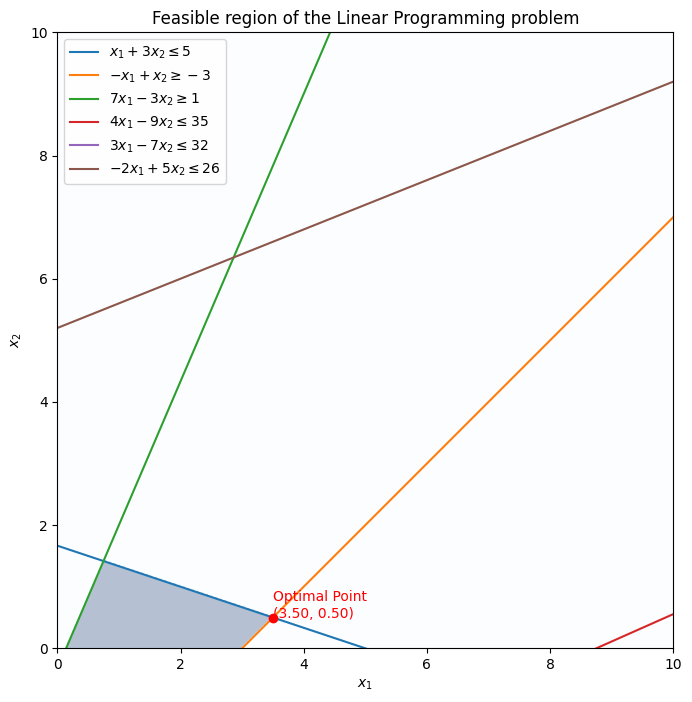

In [ ]:
# Question 2
# Solution of linear programming problem (using the incremental algorithm), Feasible region Figure

def main():
    # Define constraints
    constraints = [
        (1, 3, 5),   # x1 + 3x2 ‚â§ 5
        (-1, 1, -3), # -x1 + x2 ‚â• -3  => x1 - x2 ‚â§ 3
        (7, -3, 1),  # 7x1 - 3x2 ‚â• 1  => -7x1 + 3x2 ‚â§ -1
        (4, -9, 35), # 4x1 - 9x2 ‚â§ 35
        (3, -7, 32), # 3x1 - 7x2 ‚â§ 32
        (-2, 5, 26), # -2x1 + 5x2 ‚â§ 26
        (1, 0, 0),   # x1 ‚â• 0
        (0, 1, 0)    # x2 ‚â• 0
    ]

    # Objective function
    objective = np.array([5, 12])

    # Find the solution using the incremental algorithm
    optimal_point, optimal_value = incremental_algorithm(constraints, objective)
    print("Optimal point:", optimal_point)
    print("Optimal value:", optimal_value)

    # Create a grid of values for x1 and x2
    x1 = np.linspace(0, 10, 400)
    x2 = np.linspace(0, 10, 400)
    X1, X2 = np.meshgrid(x1, x2)

    # Initial plot setup
    plt.figure(figsize=(8, 8))

    # Define the constraints as conditions
    inequalities = [
        (X1 + 3*X2 <= 5),
        (X1 - X2 <= 3),
        (-7*X1 + 3*X2 <= -1),
        (4*X1 - 9*X2 <= 35),
        (3*X1 - 7*X2 <= 32),
        (-2*X1 + 5*X2 <= 26),
        (X1 >= 0),
        (X2 >= 0),
    ]

    # Display the feasible region
    feasible_region = np.ones_like(X1, dtype=bool)
    for inequality in inequalities:
        feasible_region &= inequality

    plt.imshow(feasible_region.astype(int), extent=(x1.min(), x1.max(), x2.min(), x2.max()), origin="lower", cmap="Blues", alpha=0.3)

    # Plot the constraint lines
    plot_constraint((1, 3, 5), r'$x_1 + 3x_2 \leq 5$')
    plot_constraint((-1, 1, -3), r'$-x_1 + x_2 \geq -3$')
    plot_constraint((7, -3, 1), r'$7x_1 - 3x_2 \geq 1$')
    plot_constraint((4, -9, 35), r'$4x_1 - 9x_2 \leq 35$')
    plot_constraint((3, -7, 32), r'$3x_1 - 7x_2 \leq 32$')
    plot_constraint((-2, 5, 26), r'$-2x_1 + 5x_2 \leq 26$')

    # Add the optimal point to the plot
    plt.scatter(optimal_point[0], optimal_point[1], color='red', zorder=5)
    plt.text(optimal_point[0], optimal_point[1], f'Optimal Point\n({optimal_point[0]:.2f}, {optimal_point[1]:.2f})', color='red')

    # Labels and axis limits
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.title('Feasible region of the Linear Programming problem')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

if __name__ == '__main__':
    main()

**Œ•ŒªŒøœÄŒøŒØŒ∑œÉŒ∑ Œì: ŒîŒπŒ¨Œ≥œÅŒ±ŒºŒºŒ± Voronoi - Œ§œÅŒπŒ≥œâŒΩŒøœÄŒøŒØŒ∑œÉŒ∑ Delaunay**

<Figure size 800x800 with 0 Axes>

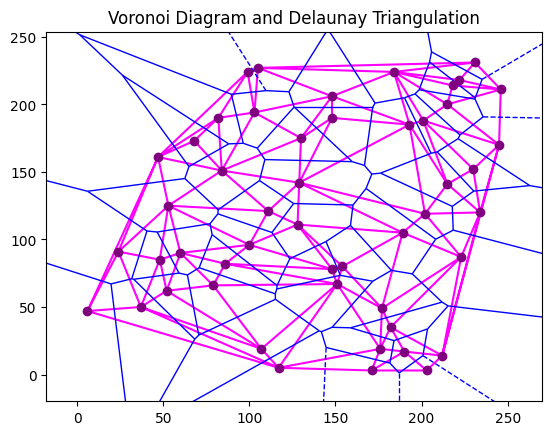


Voronoi Diagram: 0.00127363 seconds for 50 points
Delaunay Triangulation: 0.00079107 seconds for 50 points


In [ ]:
# 1. Illustration of the correspondence between the Delaunay triangulation and the Voronoi diagram for a set ùëÉ of ùëõ points
def plot_voronoi_delaunay():
    # Number of points
    num_points = 50

    # Generate random points
    points = np.random.randint(0, 250, (num_points, 2))

    # Voronoi Diagram
    start_voronoi = time.time()
    voronoi_diagram = Voronoi(points)
    end_voronoi = time.time()

    # Delaunay Triangulation
    start_delaunay = time.time()
    delaunay_triangulation = Delaunay(points)
    end_delaunay = time.time()

    # Plotting
    plt.figure(figsize=(8, 8))
    voronoi_plot_2d(voronoi_diagram, show_vertices=False, line_colors='blue')
    plt.triplot(points[:, 0], points[:, 1], delaunay_triangulation.simplices, color='magenta')
    plt.plot(points[:, 0], points[:, 1], 'o', color='purple')
    plt.title('Voronoi Diagram and Delaunay Triangulation')
    plt.show()

    # Print computation times
    print(f"\nVoronoi Diagram: {end_voronoi - start_voronoi:.8f} seconds for {num_points} points")
    print(f"Delaunay Triangulation: {end_delaunay - start_delaunay:.8f} seconds for {num_points} points")

if __name__ == '__main__':
    plot_voronoi_delaunay()

**Delaunay Triangulation**

| n         | Voronoi    | Delaunay   |
|-----------|------------|------------|
| 50        | 0.00757337 | 0.00090599 |
| 100       | 0.00284886 | 0.00111055 |
| 1.000     | 0.01361108 | 0.00859737 |
| 10.000    | 0.33079243 | 0.33079243 |
| 100.000   | 2.25415683 | 1.32467723 |
| 1.000.000 | 9.20824170 | 7.51506066 |

**2. Œ£œáŒøŒªŒπŒ±œÉŒºœåœÇ Œ±œÄŒøœÑŒµŒªŒµœÉŒºŒ¨œÑœâŒΩ**

**Œ†Œ±œÅŒ±œÑŒ∑œÅŒÆœÉŒµŒπœÇ:**
ŒìŒπŒ± œÑŒ∑ŒΩ œÖŒªŒøœÄŒøŒØŒ∑œÉŒ∑ Œ±œÖœÑŒøœç œÑŒøœÖ ŒµœÅœâœÑŒÆŒºŒ±œÑŒøœÇ œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒÆŒ∏Œ∑Œ∫Œµ Œ∑ Œ≤ŒπŒ≤ŒªŒπŒøŒ∏Œ∑Œ∫ŒÆ sciPy œÄŒøœÖ œÄŒµœÅŒπŒ≠œáŒµŒπ œÉœÖŒΩŒ±œÅœÑŒÆœÉŒµŒπœÇ Œ≥ŒπŒ± œÑŒ∑ŒΩ Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÑŒøœÖ Œ¥ŒπŒ±Œ≥œÅŒ¨ŒºŒºŒ±œÑŒøœÇ Voronoi Œ∫Œ±Œπ œÑŒ∑œÇ œÑœÅŒπŒ≥œâŒΩŒøœÄŒøŒØŒ∑œÉŒ∑œÇ Delaunay.
ŒëœÄœå œÑŒ∑ŒΩ Œ≥œÅŒ±œÜŒπŒ∫ŒÆ œÄŒ±œÅŒ¨œÉœÑŒ±œÉŒ∑ Œ≤ŒªŒ≠œÄŒøœÖŒºŒµ œåœÑŒπ Œ∑ œÑœÅŒπŒ≥œâŒΩŒøœÄŒøŒØŒ∑œÉŒ∑ Delaunay ŒµŒØŒΩŒ±Œπ o Œ¥œÖŒπŒ∫œåœÇ Œ≥œÅŒ¨œÜŒøœÇ œÑŒøœÖ Œ¥ŒπŒ±Œ≥œÅŒ¨ŒºŒºŒ±œÑŒøœÇ Voronoi.

**Œ†ŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ±:**
Œó œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ± œÑœâŒΩ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºœâŒΩ Œ≥ŒπŒ± œÑŒ∑ŒΩ Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒÆ œÑŒøœÖ Œ¥ŒπŒ±Œ≥œÅŒ¨ŒºŒºŒ±œÑŒøœÇ Voronoi Œ∫Œ±Œπ œÑŒ∑œÇ œÑœÅŒπŒ≥œâŒΩŒøœÄŒøŒØŒ∑œÉŒ∑œÇ Delaunay ŒµŒæŒ±œÅœÑŒ¨œÑŒ±Œπ Œ¨ŒºŒµœÉŒ± Œ±œÄœå œÑŒø œÄŒªŒÆŒ∏ŒøœÇ œÑœâŒΩ œÉŒ∑ŒºŒµŒØœâŒΩ ùëõ œÉœÑŒø œÉœçŒΩŒøŒªŒø ùëÉ.
Œó œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ± ŒµŒØŒΩŒ±Œπ œÄŒøŒªœÖœâŒΩœÖŒºŒπŒ∫ŒÆ  Œü(nlogn). ŒöŒ±Œ∏œéœÇ œÑŒø œÄŒªŒÆŒ∏ŒøœÇ œÑœâŒΩ œÉŒ∑ŒºŒµŒØœâŒΩ
ùëõ Œ±œÖŒæŒ¨ŒΩŒµœÑŒ±Œπ, Œ∑ œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ± œÑŒøœÖ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖ Œ±œÖŒæŒ¨ŒΩŒµœÑŒ±Œπ, ŒµœÄŒ∑œÅŒµŒ¨Œ∂ŒøŒΩœÑŒ±œÇ œÑŒøŒΩ œáœÅœåŒΩŒø ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑œÇ. Œ§Œø Œ≥ŒµŒ≥ŒøŒΩœåœÇ œåœÑŒπ ŒøŒπ œáœÅœåŒΩŒøŒπ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑œÇ Œ∫Œ±Œπ ŒøŒπ œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒµœÇ œÑœâŒΩ Œ¥œçŒø Œ¥ŒπŒ±Œ¥ŒπŒ∫Œ±œÉŒπœéŒΩ ŒµŒØŒΩŒ±Œπ œÉœáŒµŒ¥œåŒΩ ŒØŒ¥ŒπŒµœÇ ŒøœÜŒµŒØŒªŒµœÑŒ±Œπ œÉœÑŒ∑ œÉœáŒ≠œÉŒ∑ Œ¥œÖŒπœÉŒºŒøœç œÄŒøœÖ œÑŒπœÇ œÉœÖŒΩŒ¥Œ≠ŒµŒπ.

**Œ•ŒªŒøœÄŒøŒØŒ∑œÉŒ∑ Œî: ŒìŒµœâŒºŒµœÑœÅŒπŒ∫ŒÆ ŒëŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑**

In [ ]:
class KDTreeNode:
    def __init__(self, point, depth, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right
        self.depth = depth

def build_kd_tree(points, depth=0):
    if not points:
        return None

    axis = depth % 2
    sorted_points = sorted(points, key=lambda p: p[axis])
    median_index = len(sorted_points) // 2

    return KDTreeNode(
        point=sorted_points[median_index],
        left=build_kd_tree(sorted_points[:median_index], depth + 1),
        right=build_kd_tree(sorted_points[median_index + 1:], depth + 1),
        depth=depth
    )

def point_within_range(point, query_range):
    x, y = point
    x_min, x_max = query_range[0]
    y_min, y_max = query_range[1]
    return x_min <= x <= x_max and y_min <= y <= y_max

def range_intersects(node_range, query_range):
    node_x_min, node_x_max, node_y_min, node_y_max = node_range
    query_x_min, query_x_max = query_range[0]
    query_y_min, query_y_max = query_range[1]

    return not (node_x_max < query_x_min or node_x_min > query_x_max or
                node_y_max < query_y_min or node_y_min > query_y_max)

def calculate_node_range(node):
    if node is None:
        return [float('inf'), float('-inf'), float('inf'), float('-inf')]

    node_x, node_y = node.point
    left_range = calculate_node_range(node.left) if node.left else [node_x, node_x, node_y, node_y]
    right_range = calculate_node_range(node.right) if node.right else [node_x, node_x, node_y, node_y]

    return [min(node_x, left_range[0], right_range[0]),
            max(node_x, left_range[1], right_range[1]),
            min(node_y, left_range[2], right_range[2]),
            max(node_y, left_range[3], right_range[3])]

def query_kd_tree(node, query_range):
    if node is None:
        return []

    results = []
    node_range = calculate_node_range(node)

    if point_within_range(node.point, query_range):
        results.append(node.point)

    if node.left and range_intersects(calculate_node_range(node.left), query_range):
        results.extend(query_kd_tree(node.left, query_range))

    if node.right and range_intersects(calculate_node_range(node.right), query_range):
        results.extend(query_kd_tree(node.right, query_range))

    return results

def plot_kd_tree(node, x_min, x_max, y_min, y_max, query_range, depth=0):
    if node is None:
        return

    point = node.point
    axis = depth % 2

    plt.plot(point[0], point[1], 'bo')  # Plot the point

    if axis == 0:  # Vertical division
        plt.plot([point[0], point[0]], [y_min, y_max], 'm--')  # Draw the vertical line
        plot_kd_tree(node.left, x_min, point[0], y_min, y_max, query_range, depth + 1)  # Left side
        plot_kd_tree(node.right, point[0], x_max, y_min, y_max, query_range, depth + 1)  # Right side
    else:  # Horizontal division
        plt.plot([x_min, x_max], [point[1], point[1]], 'm--')  # Draw the horizontal line
        plot_kd_tree(node.left, x_min, x_max, y_min, point[1], query_range, depth + 1)  # Bottom side
        plot_kd_tree(node.right, x_min, x_max, point[1], y_max, query_range, depth + 1)  # Top side

    if depth == 0:  # After the last recursion, plot the query box
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('KD Tree and Query Range')
        qx_min, qx_max = query_range[0]
        qy_min, qy_max = query_range[1]
        plt.plot([qx_min, qx_max, qx_max, qx_min, qx_min], [qy_min, qy_min, qy_max, qy_max, qy_min], 'c--')
        plt.show()

def plot_points(points):
    plt.scatter(*zip(*points), color='cyan', marker='o')

def generate_random_query_range():
    x_min, x_max = sorted([random.randint(0, 100) for _ in range(2)])
    y_min, y_max = sorted([random.randint(0, 100) for _ in range(2)])
    return [(x_min, x_max), (y_min, y_max)]

Visualizing the steps of constructing the range tree:


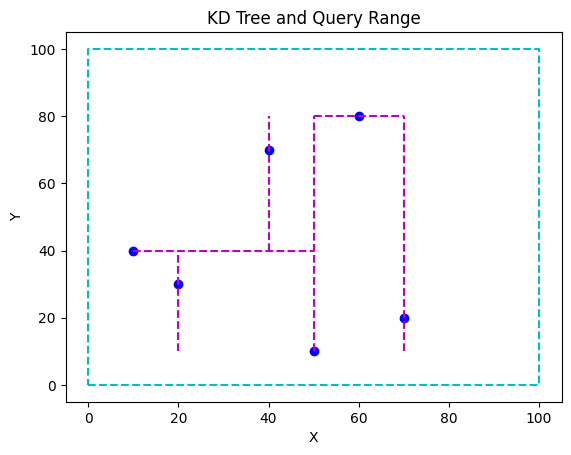


Set of Points:
[[ 49  28]
 [ 34  77]
 [ 29  88]
 [ 99  27]
 [ 32  55]
 [ 37  83]
 [ 67  98]
 [ 34   4]
 [ 95  76]
 [ 58  34]
 [ 68  12]
 [  3  33]
 [ 18  30]
 [ 79   5]
 [ 68  40]
 [  3  91]
 [ 77  21]
 [ 33  97]
 [ 68  49]
 [ 14  63]
 [ 22  70]
 [ 25   1]
 [ 61  28]
 [  8  36]
 [ 18  52]
 [ 36  74]
 [ 14   3]
 [  2  91]
 [ 65  55]
 [ 15  25]
 [ 84  41]
 [ 61  47]
 [ 99  97]
 [ 51  43]
 [ 97  71]
 [ 15  27]
 [ 11  60]
 [ 81  15]
 [ 46   6]
 [ 51  17]
 [ 93  15]
 [100  99]
 [ 69   0]
 [ 23  69]
 [ 54  52]
 [ 11  62]
 [ 33  47]
 [ 41  20]
 [ 70  80]
 [ 81  14]
 [ 59  78]
 [ 66  53]
 [ 25  30]
 [ 93  63]
 [ 62  75]
 [ 24  91]
 [ 60  20]
 [ 14  39]
 [ 21   5]
 [ 56  51]
 [ 60  90]
 [ 56  28]
 [100  68]
 [ 16  55]
 [ 32  96]
 [ 99  46]
 [ 75  86]
 [  8  55]
 [ 10   3]
 [ 44  50]
 [ 55  15]
 [ 90  75]
 [ 19  15]
 [  2  63]
 [ 12  15]
 [ 30  83]
 [ 38  67]
 [  2  58]
 [ 19  65]
 [ 78   7]
 [  3  90]
 [ 51  43]
 [ 21  38]
 [ 69  86]
 [  9  93]
 [ 46  92]
 [ 21  88]
 [ 14  31]
 [ 90  87]
 [ 61

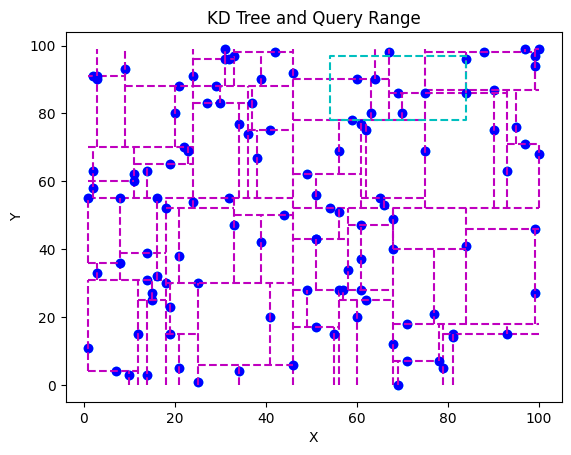


Points within the Query Range:
[59, 78]
[60, 90]
[63, 80]
[64, 90]
[69, 86]
[70, 80]
[75, 86]
[84, 86]
[84, 96]
Range search completed in 0.00127 seconds


In [ ]:
def main():
    # Small set of points for visualizing the construction steps
    small_points = np.array([(20, 30), (40, 70), (10, 40), (50, 10), (60, 80), (70, 20)])
    plt.figure()
    print("Visualizing the steps of constructing the range tree:")

    # Build the KD-Tree from the small set of points
    kd_tree = build_kd_tree(small_points.tolist())

    # Plot the KD-Tree with boundaries for better visualization
    plot_kd_tree(kd_tree, np.min(small_points[:, 0]), np.max(small_points[:, 0]),
                 np.min(small_points[:, 1]), np.max(small_points[:, 1]), [(0, 100), (0, 100)])

    # Larger set of points for search operations
    num_points = 120
    points = np.array([(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_points)])

    print("\nSet of Points:")
    print(points)

    # Measure the time taken to build the KD-Tree
    start_time = time.time()
    kd_tree = build_kd_tree(points.tolist())
    end_time = time.time()
    print(f"KD-Tree construction completed in {end_time - start_time:.5f} seconds")

    # Generate a random query range for searching within the KD-Tree
    query_range = generate_random_query_range()
    print("\nQuery Range:")
    print(query_range)

    # Plot the set of points and the KD-Tree along with the query range
    plot_points(points)
    plot_kd_tree(kd_tree, np.min(points[:, 0]), np.max(points[:, 0]),
                 np.min(points[:, 1]), np.max(points[:, 1]), query_range)

    # Measure the time taken to perform the range search in the KD-Tree
    start_time = time.time()
    found_points = query_kd_tree(kd_tree, query_range)
    end_time = time.time()

    # Print the points found within the query range
    print("\nPoints within the Query Range:")
    for point in found_points:
        print(point)

    # Output the time taken for the range search
    print(f"Range search completed in {end_time - start_time:.5f} seconds")

if __name__ == '__main__':
    main()

Œ£œÑŒ∑ŒΩ ŒøœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ œÄŒøœÖ œÄŒ±œÅŒ¨Œ≥ŒµŒπ Œø Œ∫œéŒ¥ŒπŒ∫Œ±œÇ, Œ≤ŒªŒ≠œÄŒøœÖŒºŒµ œÑŒ± ŒµŒæŒÆœÇ:

**1. Œ£Œ∑ŒºŒµŒØŒ± œÉœÑŒø ŒïœÄŒØœÄŒµŒ¥Œø:**
ŒúœÄŒªŒµ ŒöœçŒ∫ŒªŒøŒπ (Points): ŒöŒ¨Œ∏Œµ œÉŒ∑ŒºŒµŒØŒø œÄŒøœÖ œÖœÄŒ¨œÅœáŒµŒπ œÉœÑŒø ŒµœÄŒØœÄŒµŒ¥Œø, œÑŒø ŒøœÄŒøŒØŒø Œ±œÄŒøœÑŒµŒªŒµŒØ ŒºŒ≠œÅŒøœÇ œÑŒøœÖ œÉœÖŒΩœåŒªŒøœÖ œÉŒ∑ŒºŒµŒØœâŒΩ œÄŒøœÖ Œ¥œåŒ∏Œ∑Œ∫Œ±ŒΩ œâœÇ ŒµŒØœÉŒøŒ¥ŒøœÇ Œ≥ŒπŒ± œÑŒ∑ŒΩ Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒÆ œÑŒøœÖ KD Tree, Œ±œÄŒµŒπŒ∫ŒøŒΩŒØŒ∂ŒµœÑŒ±Œπ œâœÇ ŒºœÄŒªŒµ Œ∫œçŒ∫ŒªŒøœÇ.

**2. ŒîŒπŒ±œáœâœÅŒπœÉœÑŒπŒ∫Œ≠œÇ ŒìœÅŒ±ŒºŒºŒ≠œÇ (Splitting Lines):**
ŒöŒ¨Œ∏ŒµœÑŒøœÇ ŒîŒπŒ±œáœâœÅŒπœÉŒºœåœÇ (Vertical Splitting Lines): ŒüŒπ Œ¥ŒπŒ±œáœâœÅŒπœÉœÑŒπŒ∫Œ≠œÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ œÄŒøœÖ œáœâœÅŒØŒ∂ŒøœÖŒΩ œÑŒ± Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± ŒºŒµ Œ≤Œ¨œÉŒ∑ œÑŒøŒΩ Œ¨ŒæŒøŒΩŒ±
ùë•, Œ±œÄŒµŒπŒ∫ŒøŒΩŒØŒ∂ŒøŒΩœÑŒ±Œπ œâœÇ Œ∫Œ¨Œ∏ŒµœÑŒµœÇ Œ¥ŒπŒ±Œ∫ŒµŒ∫ŒøŒºŒºŒ≠ŒΩŒµœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ (m--). ŒëœÖœÑŒ≠œÇ ŒøŒπ Œ≥œÅŒ±ŒºŒºŒ≠œÇ Œ±ŒΩœÑŒπœÄœÅŒøœÉœâœÄŒµœçŒøœÖŒΩ œÑŒø ŒµœÄŒØœÄŒµŒ¥Œø Œ¥ŒπŒ±ŒØœÅŒµœÉŒ∑œÇ œÑŒøœÖ œáœéœÅŒøœÖ Œ∫Œ±œÑŒ¨ œÑŒ∑ Œ¥ŒπŒ¨œÅŒ∫ŒµŒπŒ± œÑŒ∑œÇ Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒÆœÇ œÑŒøœÖ KD Tree.
ŒüœÅŒπŒ∂œåŒΩœÑŒπŒøœÇ ŒîŒπŒ±œáœâœÅŒπœÉŒºœåœÇ (Horizontal Splitting Lines): ŒüŒπ Œ¥ŒπŒ±œáœâœÅŒπœÉœÑŒπŒ∫Œ≠œÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ œÄŒøœÖ œáœâœÅŒØŒ∂ŒøœÖŒΩ œÑŒ± Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± ŒºŒµ Œ≤Œ¨œÉŒ∑ œÑŒøŒΩ Œ¨ŒæŒøŒΩŒ±
ùë¶, Œ±œÄŒµŒπŒ∫ŒøŒΩŒØŒ∂ŒøŒΩœÑŒ±Œπ œâœÇ ŒøœÅŒπŒ∂œåŒΩœÑŒπŒµœÇ Œ¥ŒπŒ±Œ∫ŒµŒ∫ŒøŒºŒºŒ≠ŒΩŒµœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ. ŒëœÖœÑŒ≠œÇ ŒøŒπ Œ≥œÅŒ±ŒºŒºŒ≠œÇ Œ±ŒΩœÑŒπœÄœÅŒøœÉœâœÄŒµœçŒøœÖŒΩ œÑŒ± ŒµœÄŒØœÄŒµŒ¥Œ± Œ¥ŒπŒ±ŒØœÅŒµœÉŒ∑œÇ Œ≥ŒπŒ± œÑŒøŒΩ Œ¨ŒæŒøŒΩŒ± ùë¶.

**3. ŒüœÅŒ∏ŒøŒ≥œéŒΩŒπŒ± Œ†ŒµœÅŒπŒøœáŒÆ ŒëŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ (Query Range):**
ŒìŒ±ŒªŒ¨Œ∂ŒπŒø ŒîŒπŒ±Œ∫ŒµŒ∫ŒøŒºŒºŒ≠ŒΩŒø Œ†ŒªŒ±ŒØœÉŒπŒø (Cyan Dashed Box): Œ§Œø Œ≥Œ±ŒªŒ¨Œ∂ŒπŒø Œ¥ŒπŒ±Œ∫ŒµŒ∫ŒøŒºŒºŒ≠ŒΩŒø œÄŒªŒ±ŒØœÉŒπŒø Œ±œÄŒµŒπŒ∫ŒøŒΩŒØŒ∂ŒµŒπ œÑŒ∑ŒΩ ŒøœÅŒ∏ŒøŒ≥œéŒΩŒπŒ± œÄŒµœÅŒπŒøœáŒÆ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ, Œ¥Œ∑ŒªŒ±Œ¥ŒÆ œÑŒ± œåœÅŒπŒ± ŒµŒΩœÑœåœÇ œÑœâŒΩ ŒøœÄŒøŒØœâŒΩ œàŒ¨œáŒΩŒøœÖŒºŒµ ŒΩŒ± Œ≤œÅŒøœçŒºŒµ œÑŒ± œÉŒ∑ŒºŒµŒØŒ± œÑŒøœÖ œÉœÖŒΩœåŒªŒøœÖ œÄŒøœÖ Œ±ŒΩŒÆŒ∫ŒøœÖŒΩ œÉŒµ Œ±œÖœÑŒÆ œÑŒ∑ŒΩ œÄŒµœÅŒπŒøœáŒÆ.

**4. ŒëœÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ± ŒëŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ:**
Œ§Œ± œÉŒ∑ŒºŒµŒØŒ± œÄŒøœÖ Œ≤œÅŒØœÉŒ∫ŒøŒΩœÑŒ±Œπ ŒµŒΩœÑœåœÇ œÑŒ∑œÇ ŒøœÅŒ∏ŒøŒ≥œéŒΩŒπŒ±œÇ œÄŒµœÅŒπŒøœáŒÆœÇ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ Œ¥ŒµŒΩ ŒµœÄŒπœÉŒ∑ŒºŒ±ŒØŒΩŒøŒΩœÑŒ±Œπ Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫Œ¨ œÉœÑŒø Œ¥ŒπŒ¨Œ≥œÅŒ±ŒºŒºŒ±, Œ±ŒªŒªŒ¨ ŒµŒºœÜŒ±ŒΩŒØŒ∂ŒøŒΩœÑŒ±Œπ œÉœÑŒ∑ ŒªŒØœÉœÑŒ± Œ±œÄŒøœÑŒµŒªŒµœÉŒºŒ¨œÑœâŒΩ œÄŒøœÖ ŒµŒ∫œÑœÖœÄœéŒΩŒµœÑŒ±Œπ œÉœÑŒø œÑŒµœÅŒºŒ±œÑŒπŒ∫œå. ŒïŒ∫ŒµŒØ ŒºœÄŒøœÅŒµŒØœÑŒµ ŒΩŒ± Œ¥ŒµŒØœÑŒµ œÑŒπœÇ œÉœÖŒΩœÑŒµœÑŒ±Œ≥ŒºŒ≠ŒΩŒµœÇ œÑœâŒΩ œÉŒ∑ŒºŒµŒØœâŒΩ œÄŒøœÖ Œ±ŒΩŒÆŒ∫ŒøœÖŒΩ œÉœÑŒø œÄŒªŒ±ŒØœÉŒπŒø œÑŒ∑œÇ œÄŒµœÅŒπŒøœáŒÆœÇ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ.

**5. ŒíŒÆŒºŒ±œÑŒ± ŒöŒ±œÑŒ±œÉŒ∫ŒµœÖŒÆœÇ KD Tree:**
Œ£Œµ ŒºŒπŒ± ŒøœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ ŒºŒπŒ∫œÅŒøœç œÉœÖŒΩœåŒªŒøœÖ œÉŒ∑ŒºŒµŒØœâŒΩ, ŒºœÄŒøœÅŒµŒØœÑŒµ ŒΩŒ± Œ¥ŒµŒØœÑŒµ œÑŒ± Œ≤ŒÆŒºŒ±œÑŒ± Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒÆœÇ œÑŒøœÖ KD Tree. ŒöŒ±Œ∏œéœÇ œÑŒø Œ¥Œ≠ŒΩœÑœÅŒø Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒ¨Œ∂ŒµœÑŒ±Œπ, Œ∫Œ¨Œ∏Œµ ŒΩŒ≠Œø ŒµœÄŒØœÄŒµŒ¥Œø œÑŒøœÖ Œ¥Œ≠ŒΩœÑœÅŒøœÖ Œ¥ŒπŒ±œáœâœÅŒØŒ∂ŒµŒπ œÑŒøŒΩ œáœéœÅŒø ŒºŒµ ŒºŒπŒ± ŒΩŒ≠Œ± Œ≥œÅŒ±ŒºŒºŒÆ (Œ∫Œ¨Œ∏ŒµœÑŒ∑ ŒÆ ŒøœÅŒπŒ∂œåŒΩœÑŒπŒ±) Œ±ŒΩŒ¨ŒªŒøŒ≥Œ± ŒºŒµ œÑŒø Œ≤Œ¨Œ∏ŒøœÇ œÑŒøœÖ Œ∫œåŒºŒ≤ŒøœÖ œÉœÑŒø Œ¥Œ≠ŒΩœÑœÅŒø. ŒúŒµ Œ±œÖœÑœåŒΩ œÑŒøŒΩ œÑœÅœåœÄŒø, ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± Œ∫Œ±œÑŒ±ŒªŒ¨Œ≤ŒøœÖŒºŒµ œÄœéœÇ œÑŒø Œ¥Œ≠ŒΩœÑœÅŒø Œ∫Œ±œÑŒ±Œ∫ŒµœÅŒºŒ±œÑŒØŒ∂ŒµŒπ œÑŒøŒΩ œáœéœÅŒø Œ≥ŒπŒ± ŒΩŒ± Œ¥ŒπŒµœÖŒ∫ŒøŒªœçŒΩŒµŒπ œÑŒπœÇ Œ≥œÅŒÆŒ≥ŒøœÅŒµœÇ Œ±ŒΩŒ±Œ∂Œ∑œÑŒÆœÉŒµŒπœÇ.
ŒëœÖœÑŒÆ Œ∑ ŒøœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ ŒµŒØŒΩŒ±Œπ ŒπŒ¥ŒπŒ±ŒØœÑŒµœÅŒ± œáœÅŒÆœÉŒπŒºŒ∑ Œ≥ŒπŒ± œÑŒ∑ŒΩ Œ∫Œ±œÑŒ±ŒΩœåŒ∑œÉŒ∑ œÑŒøœÖ œÄœéœÇ œÑŒø KD Tree œáœâœÅŒØŒ∂ŒµŒπ œÑŒ± Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± Œ∫Œ±Œπ œÄœéœÇ œÄœÅŒ±Œ≥ŒºŒ±œÑŒøœÄŒøŒπŒµŒØœÑŒ±Œπ Œ∑ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑ œÉŒµ Œ±œÖœÑœå.